##### Body Performance of Different classes using ML Algorithms

# Steps in Model Building
1. Problem Statment
2. Aquire the Data
3.EDA
4.Sampling 
5.Model Building
6.conclusion

# Problem Statement

1 . Predicting Body Performance class on human body based on biological data.

In this project, we will Predit and analyze the different characteristics that can have an impact on the performance of the human body.

we will try some learning algorithms, to evaluate them and interpret the results at the end.

# Goals

 main objective of project is to classify the record based on there biological data.

Data:
This data set  .csv format, containing 13393 records, every 
record has 12 features each one of them containing important measurements
that could helping classify person to appropriate class.

The columns of our dataset are:

In [ ]:
age : 20 ~64
gender : F,M
height_cm : (If you want to convert to feet, divide by 30.48)
weight_kg
body fat_%
diastolic : diastolic blood pressure (min)
systolic : systolic blood pressure (min)
gripForce : strength or the maximum force
sit and bend forward_cm : sitting position
sit-ups counts :important for core stability and back support.
broad jump_cm : Jump in cm
class : A,B,C,D ( A: best) 

# Importing Necessary library in python


In [2]:
import numpy as np                # NumPy can be used to perform a wide variety of mathematical operations on arrays.
import pandas as pd               # library that is used for data manipulation and analysis.
import matplotlib.pyplot as plt   #  library that is used for  visualize Plots and Graph
import seaborn as sns             # library that is used for  visualize count plot, scatter plot, pair plots, regression plots, matrix plots and much more.
import warnings                   # Lib for removing the warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading .Csv file

In [4]:
df = pd.read_csv(r"K:\Pankaj Project\Body Perfoemance\bodyPerformance.csv")


In [5]:
df.head()   # Top 5 Records of file

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [6]:
df.shape  #  Total No of Rowss 13393 and 12 Columns 

(13393, 12)

In [7]:
df.isnull().sum().sort_values(ascending = False) # checking Null value

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [9]:
# Renaming column Name

In [10]:
df = df.rename( columns = {"class" : "Classes" , "body fat_%'" : "body_fat" } ) 

# EDA  [Exploratory Data Analysis]

In [ ]:
# Bar Plot for Gender 

In [11]:
var = dict(df.gender.value_counts())

In [12]:
var.keys()

dict_keys(['M', 'F'])

In [13]:
var.values()

dict_values([8467, 4926])

<BarContainer object of 2 artists>

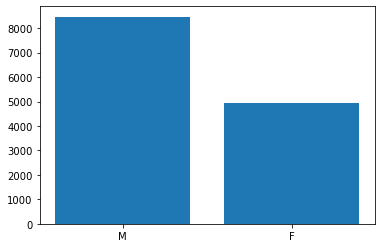

In [14]:
 plt.bar(var.keys() , var.values())

# Visualizing the Target Class

In [15]:
var1 = dict(df.Classes.value_counts())

In [16]:
var1.keys()

dict_keys(['C', 'D', 'A', 'B'])

In [17]:
var1.values()

dict_values([3349, 3349, 3348, 3347])

<BarContainer object of 4 artists>

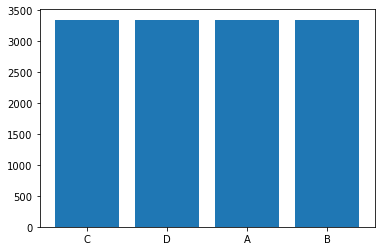

In [18]:
plt.bar(var1.keys() , var1.values())

In [146]:
# Box plot

In class A there are the youngest and thinnest, and also the performance (grip force, broad jumps etc.) of its samples are the best.


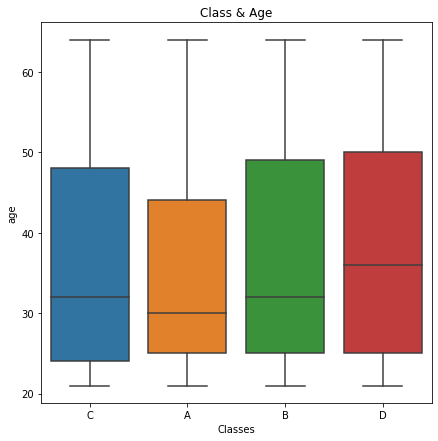

In [19]:
# Class vs Age 
plt.figure(figsize=(7,7))
sns.boxplot(data= df , x = "Classes", y ="age")
plt.title("Class & Age")

print("In class A there are the youngest and thinnest, and also the performance (grip force, broad jumps etc.) of its samples are the best.")
# checking outliers 

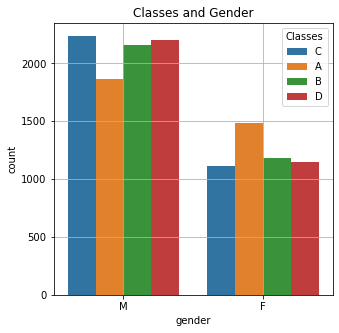

In [21]:
# Classes & Gender [Bar plot]
#data distribution with respect to class

plt.figure(figsize=(5,5))
sns.countplot(data= df , x ="gender", hue="Classes")
plt.title("Classes and Gender")
plt.grid()
plt.show()

In [22]:
# We can observe that males tend to be both taller and heavier than females, though.

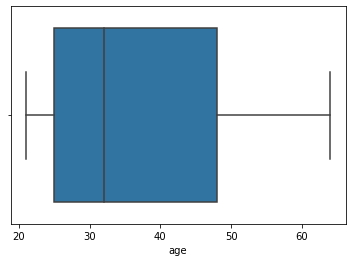

In [23]:
sns.boxplot(df.age);  # Min age within all classes is 21 & Higher age all class is 64

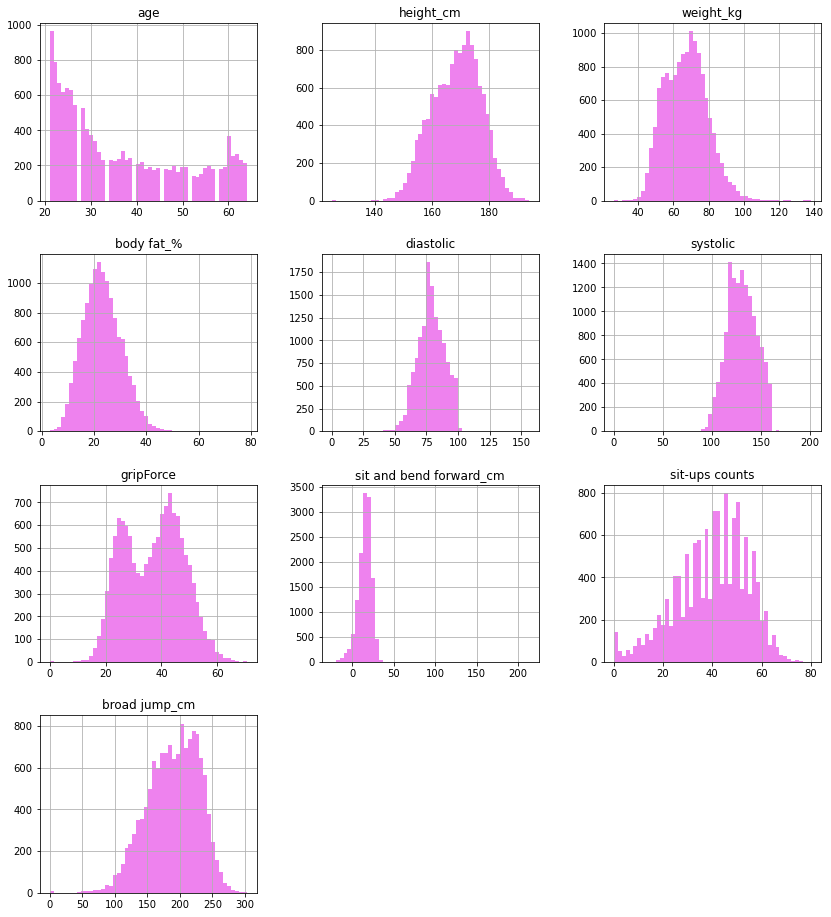

In [24]:
#Histogram of all data's feature Distribution
df.hist(bins=50 , figsize=(14,16), color = ['violet'] )
plt.show()

Some of the features class samples in graphic and tabular form. 


In [ ]:
# Correlation Matrix

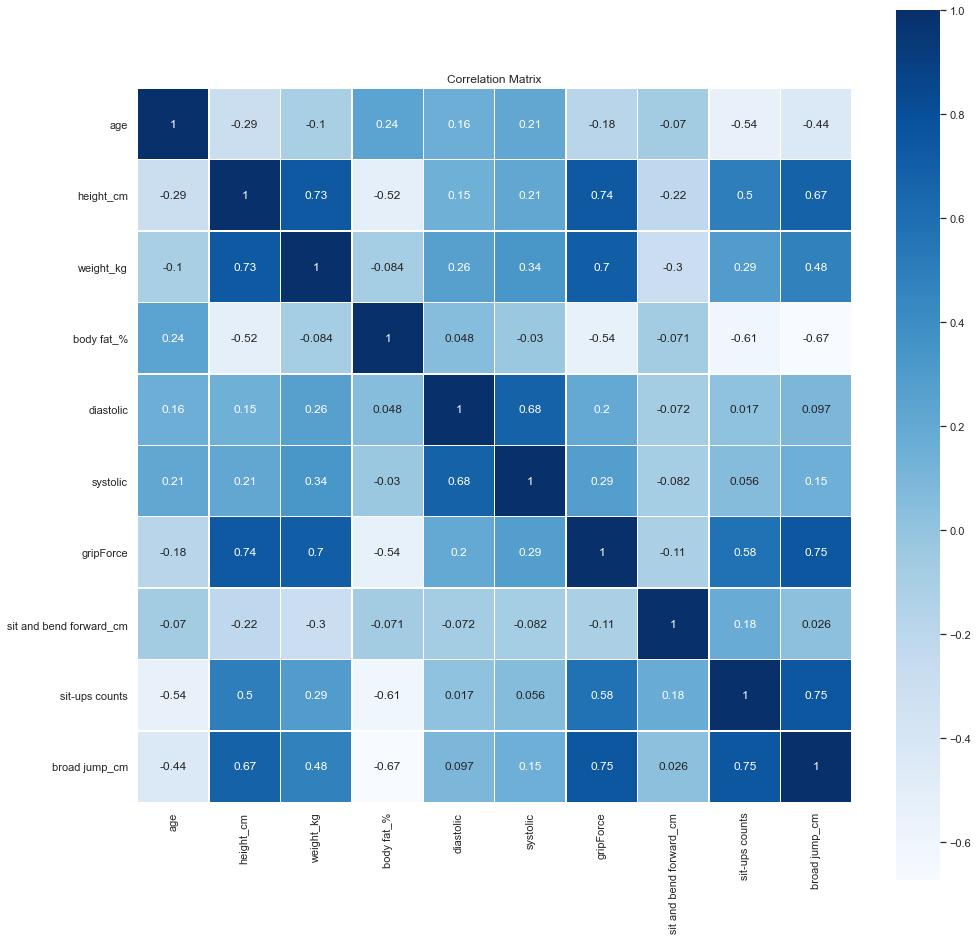

In [25]:
plt.figure(figsize = (16, 16))
sns.set(font_scale = 1)
sns.heatmap(df.corr(), cmap = "Blues", annot = True, square = True, linewidths = .5)
plt.title("Correlation Matrix");

The correlation matrix provides a fair amount of insights.


1). Broad Jump is positively correlated with both grip force and sit-up count, could be indicative of     overall physical condition/performance.

2). Grip Force is positively correlated with height and weight, indicating that taller/heavier           individuals are stronger, to a certain degree.
 
3). Body fat percentage is negatively correlated with height, grip force, sit-up count and broad-          jump. 

4). Height and weight are o positively correlated.

5). Age is negatively correlated with the exercise performance metrics.

# DATA PREPROCESSING / CLEANING

{Handling the Null value if exits And Converting of Non Numeric Data to Numeric }

In [26]:
# Datatype 

In [27]:
df.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
Classes                     object
dtype: object

In [147]:
df.columns # All columns Names

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'Classes'],
      dtype='object')

In [28]:
### Value Count of Gender column
df.gender.value_counts()

M    8467
F    4926
Name: gender, dtype: int64

In [29]:
### Converting  gender Data type to Numeric

In [30]:
df.gender = df.gender.replace({"F" : 0 , "M" : 1})

In [31]:
### Value Count of Classes

In [32]:
df.Classes.value_counts()

C    3349
D    3349
A    3348
B    3347
Name: Classes, dtype: int64

In [33]:
### Converting  Classes Data type to Numeric

In [34]:
df.Classes = df.Classes.replace({"A" : 0 , "B" : 1 , "C" : 2 , "D" : 3})

In [35]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,Classes
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [36]:
# All Data in Numeric Format

# Sampling [Train Test spliting]

In [37]:
# import Train Test
# Divide Data into Train and Test
# train Data = 80% and Test Data= 20%

In [38]:
from sklearn.model_selection import train_test_split
df_train , df_test = train_test_split(df , test_size= .2 )

In [39]:
 # In train_x we passes all independet variable 
 # In train_y we pass Only dependent variable 

In [40]:
df_train_x = df_train.iloc[:: , 0:-1]
df_train_y = df_train.iloc[:: , -1 ]

In [41]:
# Same Process For Test Data

In [42]:
df_test_x = df_test.iloc[:: , 0:-1]
df_test_y = df_test.iloc[:: , -1 ]

In [43]:
# Checking Train and Test shape

In [44]:
print(df_train_x.shape)
print(df_train_y.shape)
print("----------------")
print(df_test_x.shape)
print(df_test_y.shape)

(10714, 11)
(10714,)
----------------
(2679, 11)
(2679,)


# LogisticRegression

In [45]:
# Importing The Logistic Regression And necssary lib for confusion matrix , classification report and Cross Val score

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
# Fit the Model on Train Data

In [50]:
logreg.fit(df_train_x , df_train_y)

LogisticRegression()

In [51]:
# Predit the model on Test Data for the Acc and Performance Of Data

In [52]:
pred_logreg = logreg.predict(df_test_x)
pred_logreg

array([0, 0, 0, ..., 1, 2, 1], dtype=int64)

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
tab = confusion_matrix( pred_logreg, df_test_y)   ## we have given predicted , actual PRED ACTUAL
tab

array([[483, 160,  67,  12],
       [189, 262, 142,  42],
       [ 24, 191, 341, 100],
       [  0,  29, 117, 520]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
A1 = accuracy_score(pred_logreg , df_test_y)*100
A1

59.947741694662184

In [57]:
print(classification_report(pred_logreg , df_test_y))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       722
           1       0.41      0.41      0.41       635
           2       0.51      0.52      0.52       656
           3       0.77      0.78      0.78       666

    accuracy                           0.60      2679
   macro avg       0.60      0.60      0.60      2679
weighted avg       0.60      0.60      0.60      2679



In [58]:
#  Cross-Validation 

In [59]:
logreg_cv_acc = cross_val_score(estimator= logreg, X = df_train_x, y = df_train_y, cv=10)
print("K-Fold Validation Mean Accuracy:",logreg_cv_acc.mean()*100)
B1 = logreg_cv_acc.mean()*100
B1

K-Fold Validation Mean Accuracy: 60.14572620092813


60.14572620092813

## DecisionTreeClassifier 

In [60]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(criterion= 'entropy' , max_depth=10)

In [61]:
dt.fit(df_train_x , df_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [62]:
pred_dt = dt.predict(df_test_x)
pred_dt

array([3, 0, 2, ..., 1, 1, 1], dtype=int64)

In [63]:
tab1 = confusion_matrix(pred_dt , df_test_y)
tab1

array([[587, 192,  89,  22],
       [ 91, 345, 140,  50],
       [ 11,  75, 386,  98],
       [  7,  30,  52, 504]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
A2 = accuracy_score(pred_dt , df_test_y)*100
A2

68.01045166106756

In [66]:
print(classification_report(pred_dt , df_test_y))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74       890
           1       0.54      0.55      0.54       626
           2       0.58      0.68      0.62       570
           3       0.75      0.85      0.80       593

    accuracy                           0.68      2679
   macro avg       0.68      0.68      0.68      2679
weighted avg       0.69      0.68      0.68      2679



In [67]:
#  Cross-Validation 

In [68]:
dt_cv_acc = cross_val_score(estimator= dt, X = df_train_x, y = df_train_y, cv=10)
print("K-Fold Validation Mean Accuracy:",dt_cv_acc.mean()*100)
B2 = dt_cv_acc.mean()*100
B2

K-Fold Validation Mean Accuracy: 67.72462094290452


67.72462094290452

In [69]:
list(dt.feature_importances_) # This is the importance in probability # Higher the value more is the important

[0.12317923525352086,
 0.01798240104612905,
 0.015501070986347747,
 0.07617170960525092,
 0.09142984284371189,
 0.007793245152032638,
 0.014708166119114697,
 0.03973770744357228,
 0.38744554761557354,
 0.19577283866346024,
 0.030278235271286282]

In [70]:
feat_imp_df = pd.DataFrame({"Features" : df_train_x.columns , "Importance" : dt.feature_importances_})
feat_imp_df.sort_values('Importance', ascending= False)

,Features,Importance
8,sit and bend forward_cm,0.387446
9,sit-ups counts,0.195773
0,age,0.123179
4,body fat_%,0.091430
3,weight_kg,0.076172
7,gripForce,0.039738
10,broad jump_cm,0.030278
1,gender,0.017982
2,height_cm,0.015501
6,systolic,0.014708


In [71]:
# Remove Less importance col from above. has no importances

# Random Forrest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rfc = RandomForestClassifier() # 
rfc.fit(df_train_x , df_train_y)
pred_rfc = rfc.predict(df_test_x)
tab_rfc = confusion_matrix(pred_rfc , df_test_y)
tab_rfc

array([[587, 132,  68,  12],
       [102, 407, 118,  31],
       [  4,  73, 446,  85],
       [  3,  30,  35, 546]], dtype=int64)

In [74]:
A3 = Accuracy_rfc = accuracy_score(pred_rfc , df_test_y)*100
A3

74.13213885778276

In [75]:
print(classification_report(pred_rfc , df_test_y))

              precision    recall  f1-score   support

           0       0.84      0.73      0.79       799
           1       0.63      0.62      0.63       658
           2       0.67      0.73      0.70       608
           3       0.81      0.89      0.85       614

    accuracy                           0.74      2679
   macro avg       0.74      0.74      0.74      2679
weighted avg       0.74      0.74      0.74      2679



In [76]:
#  Cross-Validation 

In [77]:
rfc_cv_acc = cross_val_score(estimator= rfc, X = df_train_x, y = df_train_y, cv=10)
print("K-Fold Validation Mean Accuracy:",rfc_cv_acc.mean()*100)
B3 = rfc_cv_acc.mean()*100
B3

K-Fold Validation Mean Accuracy: 72.7928982538289


72.7928982538289

# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier()
knn.fit(df_train_x , df_train_y)
pred_knn = knn.predict(df_test_x)
tab_knn = confusion_matrix(pred_knn , df_test_y)
tab_knn

array([[528, 249,  98,  22],
       [154, 277, 239,  84],
       [ 13, 102, 301, 160],
       [  1,  14,  29, 408]], dtype=int64)

In [80]:
A4 = Accuracy_knn = accuracy_score(pred_knn , df_test_y)* 100
A4

56.51362448674878

In [81]:
print(classification_report(pred_knn , df_test_y))

              precision    recall  f1-score   support

           0       0.76      0.59      0.66       897
           1       0.43      0.37      0.40       754
           2       0.45      0.52      0.48       576
           3       0.61      0.90      0.72       452

    accuracy                           0.57      2679
   macro avg       0.56      0.60      0.57      2679
weighted avg       0.57      0.57      0.56      2679



In [82]:
#  Cross-Validation 

In [83]:
knn_cv_acc = cross_val_score(estimator= knn, X = df_train_x, y = df_train_y, cv=10)
print("K-Fold Validation Mean Accuracy:",knn_cv_acc.mean()*100)
B4 = knn_cv_acc.mean()*100
B4

K-Fold Validation Mean Accuracy: 56.10429121897514


56.10429121897514

# AdaBoostClassifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
adb = AdaBoostClassifier()
adb.fit(df_train_x , df_train_y)
pred_adb = adb.predict(df_test_x)
tab_adb = confusion_matrix(pred_adb , df_test_y)
tab_adb

array([[500, 135,  66,  15],
       [186, 364, 171,  41],
       [  7, 108, 357, 214],
       [  3,  35,  73, 404]], dtype=int64)

In [86]:
A6 = Accuracy_adb = accuracy_score(pred_adb , df_test_y)*100
A6

60.65696155281821

In [87]:
print(classification_report(pred_adb , df_test_y))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       716
           1       0.57      0.48      0.52       762
           2       0.54      0.52      0.53       686
           3       0.60      0.78      0.68       515

    accuracy                           0.61      2679
   macro avg       0.61      0.62      0.61      2679
weighted avg       0.61      0.61      0.60      2679



In [88]:
#  Cross-Validation 

In [89]:
adb_cv_acc = cross_val_score(estimator= adb, X = df_train_x, y = df_train_y, cv=10)
print("K-Fold Validation Mean Accuracy:",adb_cv_acc.mean()*100)
B6 = adb_cv_acc.mean()*100
B6

K-Fold Validation Mean Accuracy: 59.18469626656633


59.18469626656633

# XGBClassifier -(eXtreme Gradient Boosting)

In [90]:
from xgboost import XGBClassifier

In [91]:
xgb = XGBClassifier()
xgb.fit(df_train_x , df_train_y)
pred_xgb = xgb.predict(df_test_x)
tab_xgb = confusion_matrix(pred_xgb , df_test_y)
tab_xgb

[09:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[596, 132,  51,  10],
       [ 88, 402, 131,  32],
       [ 10,  83, 463,  84],
       [  2,  25,  22, 548]], dtype=int64)

In [92]:
A5 = Accuracy_xgb = accuracy_score(pred_xgb , df_test_y)* 100
A5

74.99066815976111

In [93]:
print(classification_report(pred_xgb , df_test_y))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80       789
           1       0.63      0.62      0.62       653
           2       0.69      0.72      0.71       640
           3       0.81      0.92      0.86       597

    accuracy                           0.75      2679
   macro avg       0.75      0.75      0.75      2679
weighted avg       0.75      0.75      0.75      2679



In [94]:
#  Cross-Validation 

In [95]:
xgb_cv_acc = cross_val_score(estimator= xgb, X = df_train_x, y = df_train_y, cv=5)
print("K-Fold Validation Mean Accuracy:",xgb_cv_acc.mean()*100)
B5 = xgb_cv_acc.mean()*100
B5

[09:36:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:36:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:36:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

74.67792778956348

To conclude the model works well on class D and class A. It can be considered a good result due to we are more interested in forecasting the best and the worst one. So, this model can answer to the question: what is the best performance I can reach?

Logistic Regression","DecisionTree", "RandomForest",  "KNeigbors", "AdaBoostClassifier" were used  before "XGBClassifier". that XGBoost give higher accuracy.

XGBoost classifier model has been trained to predict 'class' of a person.



Final results of using stacking modeling classifier:
 
Accuracy: 74.43%

Cv Accuracy : 74.65 %

F1: 74%


# Model Comparison

In [96]:
model_evaluation = { "model":["Logistic Regression","DecisionTree", "RandomForest",  "KNeigbors", "XGBClassifier", "AdaBoostClassifier"],
                   "Accuracy":[A1,A2,A3,A4,A5,A6],
                   "K-Fold Mean Accuracy":[B1,B2,B3,B4,B5,B6]}

In [97]:
model = pd.DataFrame(model_evaluation)
model.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
model

,model,Accuracy,K-Fold Mean Accuracy
4,XGBClassifier,74.990668,74.677928
2,RandomForest,74.132139,72.792898
1,DecisionTree,68.010452,67.724621
5,AdaBoostClassifier,60.656962,59.184696
0,Logistic Regression,59.947742,60.145726
3,KNeigbors,56.513624,56.104291


In [98]:
Accuracy = A1,A2,A3,A4,A5,A6 # Storing all Acc in a Single Variable

In [99]:
performance = pd.DataFrame({'Model': ['logreg', 'dt', 'rfc', 'knn' , 'xgb' , "adb"],
                           'Accuracy': [A1,A2,A3,A4,A5,A6]})

In [126]:
# Bar Plot

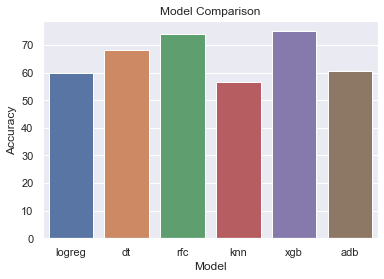

In [100]:
sns.barplot(x='Model',y='Accuracy',data= performance)
plt.title('Model Comparison');

To conclude the model works well on class D and class A. It can be considered a good result due to we are more interested in forecasting the best and the worst one. 

# Parameter tunning XgBoost Using GridSearch Cv

In [101]:
learning_rate = [0.01,0.05,0.1]
min_child_weight = [1,2,3]
colsample_bytree = [0.6,0.7,0.8]
max_depth = [5,10,15,20]
eval_metric = ['error']

In [102]:
search_grid ={"learning_rate" :learning_rate,
              "min_child_weight" : min_child_weight,
              "colsample_bytree" : colsample_bytree,
              "max_depth" : max_depth,
              "eval_metric" : eval_metric}

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
Xgb_grid = GridSearchCV(estimator= xgb  ,param_grid = search_grid ,scoring = 'accuracy',cv = 5 , n_jobs = -1 )

In [105]:
Xgb_grid.fit(df_train_x , df_train_y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=10...
                                     objective='multi:softprob',
                                     predictor='auto', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos

In [106]:
Xgb_grid.best_params_

{'colsample_bytree': 0.8,
 'eval_metric': 'error',
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 3}

In [127]:
model_2 = XGBClassifier(colsample_bytree = 0.8,eval_metric = 'error',learning_rate = 0.1,max_depth= 10,min_child_weight = 3)

In [128]:
model_2.fit(df_train_x , df_train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='error', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
pred_model_2 = model_2.predict(df_test_x)
tab_model2 = confusion_matrix(pred_model_2, df_test_y)
tab_model2

array([[594, 125,  55,  12],
       [ 93, 429, 134,  34],
       [  7,  61, 454,  80],
       [  2,  27,  24, 548]], dtype=int64)

In [130]:
Accuracy_model_2 = accuracy_score(pred_model_2, df_test_y)*100
Accuracy_model_2

75.58790593505039

In [131]:
# Accuracy using Grid For XgBoost  75.58

In [112]:
print(classification_report(pred_model_2, df_test_y))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80       790
           1       0.64      0.61      0.62       677
           2       0.68      0.74      0.71       614
           3       0.81      0.92      0.86       598

    accuracy                           0.75      2679
   macro avg       0.75      0.75      0.75      2679
weighted avg       0.75      0.75      0.75      2679



In [113]:
model_2_cv_acc = cross_val_score(estimator= model_2 , X = df_train_x , y = df_train_y , cv = 7)
print("K-Fold Validation Mean Accuracy:",model_2_cv_acc.mean()*100)

K-Fold Validation Mean Accuracy: 75.08868385150707


In [132]:
#Average Accuracy using Grid For XgBoost  75.08

# Parameter Tuninng Using RandomizedSearchCV

In [115]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [116]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [117]:
#classifier=xgboost.XGBClassifier()


In [118]:
Xgb_random=RandomizedSearchCV(estimator= xgb,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [119]:
Xgb_random.fit(df_train_x , df_train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[09:56:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_

In [120]:
Xgb_random.best_params_

{'min_child_weight': 5,
 'max_depth': 15,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [141]:
model_3 = XGBClassifier(min_child_weight = 5, max_depth = 15,learning_rate = 0.3,gamma = 0.4,colsample_bytree = 0.7)

In [142]:
pred_model_3 = Xgb_random.predict(df_test_x)
tab_model3 = confusion_matrix(pred_model_3, df_test_y)
tab_model3

array([[578, 119,  55,  11],
       [100, 408, 126,  31],
       [ 14,  83, 456,  80],
       [  4,  32,  30, 552]], dtype=int64)

In [143]:
print(classification_report(pred_model_3, df_test_y))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       763
           1       0.64      0.61      0.62       665
           2       0.68      0.72      0.70       633
           3       0.82      0.89      0.85       618

    accuracy                           0.74      2679
   macro avg       0.74      0.75      0.74      2679
weighted avg       0.74      0.74      0.74      2679



In [144]:
3
Accuracy_model_3 = accuracy_score(pred_model_3, df_test_y)*100
Accuracy_model_3

74.4307577454274

In [145]:
#Average Accuracy using Random search cv For XgBoost  74.43

Conclusion


Assigning a class to each person based on their biological data and building a machine learning algorithm ,
With The help of this project we will predict the health of particular person.